# Differentiation and Searching
[Numerical differentiation](https://personal.math.ubc.ca/~pwalls/math-python/differentiation/differentiation/) in really straightforward, where we will evaluate the forward, central, and extrapolated-difference methods.  Another tool is trial-and-error searching which can be used in root-finding, minimization, and is widely used to solve problems where analytic solutions do not exist or are impractical.

## Numerical differentiation
Before implementing a numerical method for differentiation, let's review some basics from Introductory Calculus.  The elementery definition was

$\frac{dy(t)}{dt} = \displaystyle \lim_{h\rightarrow 0}\frac{y(t+h)-y(t)}{h}$,

but this is impractical to implement in a computer.  The denominator is approaching zero and the finite machine prescision causes oscillations in the solution.  Therefore we implement a series of approximations to obtain a practical solution.

### Forward difference
The most direct method for numerical differentiaion starts by expanding a function in a Taylor series to obtain its value a small step *h* away:

$y(t+h) = y(t) + h\frac{dy(t)}{dt} + \frac{h^2}{2!}\frac{d^2y(t)}{dt^2} + \frac{h^3}{3!}\frac{d^3y(t)}{dt^3} + \cdots$.

We obtain a *forward-difference* derivative by using the approximation in the elementary definition for $y^\prime(t)$:

$\frac{dy(t)}{dt}\biggr\rvert_{fd} = \frac{y(t+h)-y(t)}{h}$.

An approximation for the error follows from substituting the Taylor series:

$\frac{dy(t)}{dt}\biggr\rvert_{fd} \simeq \frac{dy(t)}{dt} + \frac{h}{2}\frac{d^2y(t)}{dt^2} + \cdots$.

You can think of this approximation as using two points to represent the function by a straight line between $x$ and $x+h$.  The approximation has an error proportional to $h$ (the slope of the line).  Therefore, we can make the approximation error smaller by taking smaller steps (decreasing $h$), yet there will be some round-off error that is present from the subtraction in the *forward-differenece* derivative.  To see how this algorithm works, let $y(t) = a + bt^2$, where the exact derivative is $y^\prime = 2bt$ and the computed derivative is:

$\frac{dy(t)}{dt}\biggr\rvert_{fd} \simeq \frac{y(t+h)-y(t)}{h} = \frac{a+b(t+h)^2 - a - bt^2}{h} = \frac{2bth + bh^2}{h} = 2bt + bh$.

This approximation is only good for small *h*, where the $bh \ll 1$.  Implementing the *forward-difference* algorithm in python is super easy.  Simply use the *diff* function from **numpy**.  Suppose you have an array of *N* values in *y*, then *np.diff(y)* returns an array with length *N-1* containing the consecutive differences (i.e., y[1]-y[0], y[2]-y[1], ...).  If the values are sampled at regular intervals in the *t* array, then $y^\prime(t)$ = np.diff(y)/(t[1]-t[0]).



### Central difference
An improved approximation uses the principles from the Taylor series (i.e., expand relative to a central point).  Now, rather than making a single step of *h* forward, we form a *central difference* by stepping forward a half-step and backward a half-step:

$\frac{dy(t)}{dt}\biggr\rvert_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}$.

We estimate the error by substituting the Taylor series for $y(t\pm h/2)$.  **Do you think this will result in a better approximation? Why?** By substitution, we find:

$y(t+\frac{h}{2})-y(t-\frac{h}{2}) \simeq \left[y(t) + \frac{h}{2}y^\prime(t) + \frac{h^2}{8}y^{\prime\prime}(t) + \frac{h^3}{48}y^{\prime\prime\prime}(t) + O(h^4)\right] - \left[y(t) - \frac{h}{2}y^\prime(t) + \frac{h^2}{8}y^{\prime\prime}(t) - \frac{h^3}{48}y^{\prime\prime\prime}(t) + O(h^4)\right]$

and through many cancellations, we find:

$y(t+\frac{h}{2})-y(t-\frac{h}{2}) \simeq hy^\prime(t) + \frac{h^3}{24}y^{\prime\prime\prime}(t) + O(h^5)$,

and the *central-difference* derivative is:

$\frac{dy(t)}{dt}\biggr\rvert_{cd} = y^\prime(t) + \frac{h^2}{24}y^{\prime\prime\prime}(t) + O(h^4)$.

The important difference between the *forward-difference* and *central-difference* algorithms is that the *central-difference* algorithm cancels the terms with an even power of *h* in from each of the Taylor series.  This makes the leading-order error of *central-difference* accurate to $h^2$, while the *forward-difference* is only accurate to order *h*.  Returning to our parabola example ($y(t) = a + bt^2$), we see that the *central-difference* gives the exact derivative independent of $h$:

$\frac{dy(t)}{dt}\biggr\rvert_{cd} \simeq \frac{y(t+h/2)-y(t-h/2)}{h} = \frac{a+b(t+h/2)^2 - a - b(t-h/2)^2}{h} = \frac{2bth}{h} = 2bt$.

The **numpy** module has a special function called [gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) that performs a second order central differences method on the input array and requires the stepsize *h* as an argument.  From an array with *N* elements $y(t)$, it returns an array of *N* elements for $y^\prime(t)$.

### Extrapolated difference
You may have noticed that different differentiation rules will keep a different number of terms in a Taylor series expansion, which also providesan expression for the error.  We can reduce the error further by combining several algorithims together so that the summed errors extrapolate to zero.  For example, we could employ two *central-difference* algorithms as a linear combination, where the first algorithm takes half-steps and the second takes quarter-steps.  Let's look at the quarter-step approximation ($h\rightarrow h/2$):

$\frac{dy(t)}{dt}\biggr\rvert_{cd}^{h/4} = \frac{y(t+h/4)-y(t-h/4)}{h/2} = y^\prime(t) + \frac{h^2}{96}y^{\prime\prime\prime}(t) + O(h^4)$.

The quarter-step derivative produces a factor of 1/96 instead of the 1/24 on the second order term.  If we want to cancel this term, we realize that 96 = 4*24 and so we perform the following subtraction to get:

$4\frac{dy(t)}{dt}\biggr\rvert_{cd}^{h/4} - \frac{dy(t)}{dt}\biggr\rvert_{cd}^{h/2} = 4y^\prime(t) + \frac{h^2}{24}y^{\prime\prime\prime}(t) - y^\prime(t) - \frac{h^2}{24}y^{\prime\prime\prime}(t) = 3 y^\prime(t) + O(h^4)$

Thus, we find for the *extrapolated-difference* the following:

$\frac{dy(t)}{dt}\biggr\rvert_{ed} = \frac{4}{3}\frac{dy(t)}{dt}\biggr\rvert_{cd}^{h/4} - \frac{1}{3}\frac{dy(t)}{dt}\biggr\rvert_{cd}^{h/2} \simeq y^\prime(t) + O(h^4)$

## Second Derivatives
Many problems in physics involve a second derivative, or acceleration.  One of the most important equations is Newton's second law that tells us that a force $F$ and acceleration $a$ are linearly related:

$F = ma = m\frac{d^2y}{dt^2}$,

where $m$ is a particle's mass and the acceleration can be expressed as the second derivative of a function $y(t)$.  If we can determin the acceleration, then we can determine the force.  Using the *central-difference* method for the first derivative, we have:

$\frac{dy(t)}(dt) \simeq \frac{y(t+h/2)-y(t-h/2)}{h}$,

which gives the derivative at t by moving forward and backward from t by a half-step $h/2$.  We take the second derivative by applying the same operation again as follows:

$\frac{d^2y(t)}{dt^2} \simeq \frac{y^\prime(t+h/2)-y^\prime(t-h/2)}{h} \simeq \frac{[y(t+h)-y(t)]-[y(t)-y(t-h)]}{h^2} = \frac{y(t+h)-2y(t)+y(t-h)}{h^2}$


## Root Via Bisection
Trial-and-error root finding looks for a vlaue of $x$ at which $f(x)=0$, where the $f(x)$ can be polynomials or a trancendental function (e.g., $10\sin x = 3x^3 \rightarrow 10\sin x - 3x^3 = 0$).  The search procedure starts with a guess for $x$, substitutes that guess into $f(x)$ (i.e., the trial), and sees how far from zero the evaluated function is (i.e., the error).  the program then revises the guess $x$ based on the error and then substitutes the revised guess into $f(x)$ again.  The procedure continues until $f(x)\simeq 0$ or to some desired level of precision.  Sometimes the procedure is stopped once it appears progress is not being made.

The most elementary trial-and-error technique is the *bisection algorithm*.  It is reliable, but slow.  If you know some interval in which $f(x)$ changes sign, then the [bisection algorithm](https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/) is the way to go.  The basis of the bisection algorithm is that we start with two values of $x$ between which a zero occurs (i.e., the bounds).  Let us say that $f(x)$ is negative at $a$ and positive at $b$.  Thus we start with the interval $a\geq x \geq b$ within which we know a zero occurs.  Then we evaluate each of these tasks for a given iteration:

1. Calculate $c$, the midpoint of the interval, $c = \frac{a+b}{2}$.
2. Evaluate the function at the midpoint, $f(c)$.
3. If convergence is satisfactory (i.e., $|f(c)|\simeq 0$), return c and stop iterating.
4. Examine the sign of $f(c)f(a)$.
    - If negative then set $b = c$ and return to step 1.
    - Else set $a = c$ and return to step 1.

Let's turn these steps into code:

In [1]:
def bisection(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.
    f : function
    a,b : The interval in which to search for a solution. 
    N : The number of iterations to implement.'''
    if f(a)*f(b) >= 0: #checking that a zero exist in the interval [a,b]
        print("Bisection method fails.")
        return None
    #initial interval 
    a_n = a 
    b_n = b
    for n in range(1,N+1):
        c = (a_n + b_n)/2 #calculate midpoint
        f_c = f(c) #evaluate function at midpoint
        if f(a_n)*f_c < 0: #evaluate sign
            b_n = c
        elif f(b_n)*f_c < 0: #evaluate sign
            a_n = c
        elif f_c == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2

Now let's try our function on a problem from quantum mechanics.  The most standard problem is to solve for the energies of a particle of mass $m$ bound within a 1-D square well of radius $a$.  The potential $V(x) = -V_o$ if $|x|\leq a$, otherwised it is zero.  From quantum mechanics textbooks we know there is a [solution](https://ocw.mit.edu/courses/physics/8-04-quantum-physics-i-spring-2016/lecture-notes/MIT8_04S16_LecNotes11.pdf) for the energies of the bound states $E_B$:

$\sqrt{V_o - E_B}\tan(\sqrt{V_o - E_B}) = \sqrt{E_B}$ (even),

and

$\sqrt{V_o - E_B}\cot(\sqrt{V_o - E_B}) = \sqrt{E_B}$ (odd).

Here we have chosen units such that $\hbar=1$, $2m=1$, and $a=1$.  Now we want to find several of the bound state energies for the even wave functions.  First we have to find a reasonable interval and then apply our algorithm.

our method   =  8.59278527522984
scipy method =  8.592785275230199


Text(0, 0.5, '1D finite well solution')

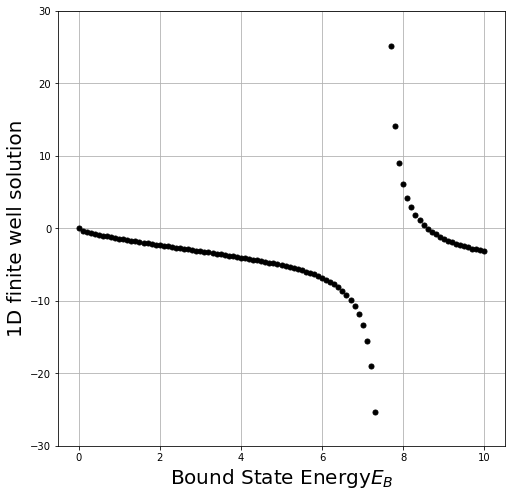

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
V_o = 10 #define the potential
def even_func(E_B):
    #E_B is a guess at the ground state energy
    if (V_o - E_B)>= 0:
        temp = np.sqrt(V_o - E_B)
        return temp*np.tan(temp) - np.sqrt(E_B)
    else:
        return np.nan

fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)

x_rng = np.arange(0,15,0.1)

for x in x_rng:
    y = even_func(x)
    ax.plot(x,y,'k.',ms=10)
#root_EB = bisection(even_func,8,10,50)
#scipy_root = bisect(even_func,8,10)  
#print("our method   = ",root_EB)
#print("scipy method = ",scipy_root)  
#ax.plot(root_EB,even_func(root_EB),'r.',ms=10)


ax.grid(True)
ax.set_ylim(-30,30)
ax.set_xlabel("Bound State Energy$ E_B$",fontsize=20)
ax.set_ylabel("1D finite well solution",fontsize=20)

## Newton-Raphson searching
The Newton-Raphson (NR) algorithm is another way to find roots, but it is much quicker than the bisection method.  The NR method is equivalent to drawing a straight line $f(x)\simeq mx + b$ to a curve at an $x$ value for which $f(x) \simeq 0$.  Then it uses the intercept of the line with the $x$ axis at $-b/m$ as an imporved guess for the root.  If the "curve" were a straight line, then the answer would be exact.  Otherwise, it is a good approximation if the guess is close enough to the root for $f(x) to be nearly linear.

As an [iteration](https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/) scheme, we need to start with a guess $x_o$, then find a correction to the guess $\Delta x$, and finally formulate a new guess $x = x_o + \Delta x$.  Recall that the equation of a line can be formulated in terms of a Taylor series, keeping on the first two terms:

$f(x) \simeq f(x_o) + \frac{df}{dx}\biggr\rvert_{x_o}\Delta x$.

We then determine the correction $\Delta x$ by calculating the point at which this linear appromation to $f(x)$ would cross the $x$ axis:

$f(x_o) + \frac{df}{dx}\biggr\rvert_{x_o}\Delta x = 0$

$\Delta x = -\frac{f(x_o)}{df/dx\rvert_{x_o}}$.

Notice that the NR method requires the calculation of the first derivative $df/dx$ at each guess.  In many cases you may have an analytic expression for the derivative and can build it into the algorithm.  However, it is simpler to use a numerical *forward-difference* approximation to the derivative.  While a central-difference approximation would be more accurate, it would require addition function evaluations and the overall process would take longer to run.

## Problems
-   Complete the following problems in a Jupyter notebook, where you will save your results as an external file (*.png) as needed.
-   Create a LaTex document with:
    -   an abstract summary
    -   sections for each problem that state the problem, summarize what you did, and display the results
    -   include a reference for each solution (this can be textbooks)

1.  Write a program to calculate sin(x) and cos(x).  Calculate and plot the numerical derivatives using a) forward-difference, b) central-difference, and c) the analytical derivative.

2.  Write a function to implement the Newton-Raphson method.  Apply it to the 1D Quantum well example and compare it to the bisection method.  Also compare your implementation to the function from *scipy.optimize*.
